$$
min\ 3x^2+2y^2 \\
subject\ to\ x+y\ge1 
$$
$f(x)=3x^2+2y^2$, $h(x)=1-x-y$とおくことにする

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>")) 

In [24]:
def raw_target(x):
    return 3 * x[0] ** 2 + 2 * x[1] ** 2

def target(x, c):
    return 3 * x[0] ** 2 + 2 * x[1] ** 2 - c * np.log(x[0] + x[1] - 1)

def diff_target(x, A, c):
    return np.dot(A, x) - c * (2 / (x[0] + x[1] - 1))

In [25]:
def draw_contour(target):
    n = 100
    x = np.linspace(-5, 5, n)
    y = np.linspace(-5, 5, n)
    X, Y = np.meshgrid(x, y)
    Z = target([X, Y])

    plt.gca().set_aspect('equal')
    plt.contour(X, Y, Z, levels=np.linspace(0, 200, 15))

In [26]:
def backtrack(x, target, A, c, alpha, beta):
    eps = 1.0
    temp = x - eps*diff_target(x, A, c)
    while(temp[0] + temp[1] - 1 <= 0):
        eps *= beta
        temp = x - eps*diff_target(x, A, c)
    while(target(x - eps*diff_target(x, A, c), c) - target(x, c) > -alpha*eps*np.linalg.norm(diff_target(x, A, c))**2):
        eps *= beta
    return eps

def do_backtrack(x1, target, A, c, alpha, beta, times):
    x = x1
    ans = np.copy(x1)
    for i in range(times):
        x -= backtrack(x, target, A, c, alpha, beta) * diff_target(x, A, c)
        ans = np.vstack([ans, x])
    return ans

In [91]:
alpha = 0.5
beta = 0.8
A = np.array([[6, 0],[0, 4]])
ans = do_backtrack(np.array([5, 5], dtype='float64'), target, A, 2, alpha, beta, 4)

In [92]:
ans

array([[5.        , 5.        ],
       [0.0414006 , 1.7191222 ],
       [0.26179271, 1.64800804],
       [0.64106662, 1.35333771],
       [0.7312344 , 0.64122652]])

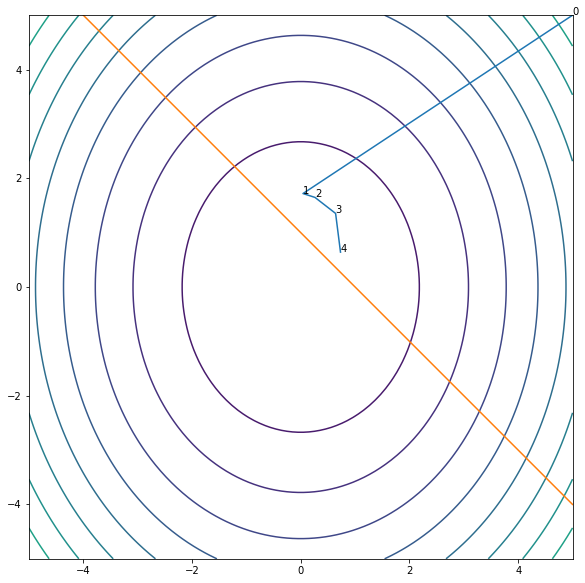

In [93]:
fig,ax = plt.subplots()
ax.plot(ans[:, 0], ans[:, 1])
ax.plot([-4, 5], [5, -4])
draw_contour(raw_target)
for i, (x, y) in enumerate(zip(ans[:, 0], ans[:, 1])):
    ax.annotate(str(i), (x, y))